<a href="https://colab.research.google.com/github/Michael0605/TelecomX_LATAM/blob/main/Copia_de_TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Cargar los datos directamente desde la API utilizando Python.
*Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [75]:
import requests
import pandas as pd

# 1. Cargar datos desde la API de GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
response = requests.get(url)

if response.status_code == 200:
    # 2. Convertir JSON a DataFrame inicial
    data = response.json()
    df_flat_raw = pd.DataFrame(data)

    # 3. Normalizar columnas anidadas
    df_flat_customer = pd.json_normalize(df_flat_raw['customer'])
    df_flat_phone = pd.json_normalize(df_flat_raw['phone'])
    df_flat_internet = pd.json_normalize(df_flat_raw['internet'])
    df_flat_account = pd.json_normalize(df_flat_raw['account'])

    # 4. Combinar todas las columnas en un DataFrame plano
    df_flat = pd.concat([
        df_flat_raw[['customerID', 'Churn']],  # Columnas no anidadas
        df_flat_customer,
        df_flat_phone,
        df_flat_internet,
        df_flat_account
    ], axis=1)

    # 5. Mostrar el resultado
    print("DataFrame plano listo para análisis:")
    print(df_flat.head())

    # Opcional: Guardar como CSV
    df_flat.to_csv('telecomx_clientes_flat.csv', index=False)
else:
    print(f"Error al cargar datos. Código: {response.status_code}")

DataFrame plano listo para análisis:
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes       

In [76]:
df_flat.info()  # Revisar si 'SeniorCitizen' es int y 'Charges.Total' es float


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Corregir tipos de datos


Explorar datos nulos.

In [77]:
df_flat.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


✅ Explorar las columnas del dataset y verificar sus tipos de datos.
✅ Consultar el diccionario para comprender mejor el significado de las variables.
✅ Identificar las columnas más relevantes para el análisis de evasión.



 Exploración Inicial del DataFrame


In [78]:
# Mostrar las primeras filas
print(df_flat.head())

# Ver estructura del DataFrame (columnas y tipos de datos)
print("\nInformación del DataFrame:")
print(df_flat.info())

# Estadísticas descriptivas de columnas numéricas
print("\nEstadísticas descriptivas:")
print(df_flat.describe())

# Ver valores únicos en columnas categóricas (ej: Churn, gender)
print("\nValores únicos en 'Churn':", df_flat['Churn'].unique())
print("Valores únicos en 'Contract':", df_flat['Contract'].unique())

   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

Muestras las columnas existentes


In [79]:
print(df_flat.columns.tolist())

['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


filtrado para insights

In [80]:
# Analisis por tipo de contrato
print("***Churn por tipo de contrato***")
print(df_flat.groupby('Contract')['Churn'].value_counts(normalize=True))

# Analisis por cargo mensual (agrupado)
print("***Churn por cargo mensual***")
df_flat['MonthlyGroup'] = pd.cut(df_flat['Charges.Monthly'], bins=[0, 50, 100, 150, 200])

print(df_flat.groupby('MonthlyGroup')['Churn'].value_counts())

***Churn por tipo de contrato***
Contract        Churn
Month-to-month  No       0.554307
                Yes      0.413233
                         0.032459
One year        No       0.860434
                Yes      0.109282
                         0.030283
Two year        No       0.944923
                         0.027539
                Yes      0.027539
Name: proportion, dtype: float64
***Churn por cargo mensual***
MonthlyGroup  Churn
(0, 50]       No       1938
              Yes       361
                         81
(50, 100]     No       2587
              Yes      1255
                        108
(100, 150]    No        649
              Yes       253
                         35
(150, 200]                0
              No          0
              Yes         0
Name: count, dtype: int64


/tmp/ipython-input-1609488752.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_flat.groupby('MonthlyGroup')['Churn'].value_counts())


Limpieza y Preparación de Datos

In [81]:
# Convertir 'Charges.Total' a numérico (manejando errores)
df_flat['Charges.Total'] = pd.to_numeric(df_flat['Charges.Total'], errors='coerce')

# Rellenar nulos (ej. con 0 para nuevos clientes)
df_flat['Charges.Total'] = df_flat['Charges.Total'].fillna(0)

# Codificar variables categóricas (ej. Churn: Yes=1, No=0)
df_flat['ChurnBinary'] = df_flat['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

Visualización Rápida con Seaborn

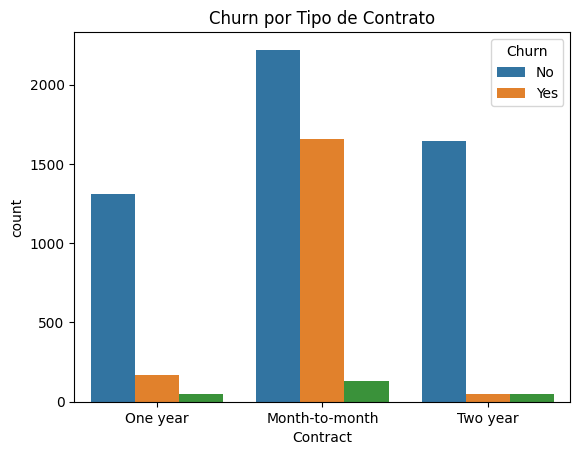

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras: Churn por tipo de contrato
sns.countplot(data=df_flat, x='Contract', hue='Churn')
plt.title('Churn por Tipo de Contrato')
plt.show()

Exploración Inicial del Dataset

In [83]:
# Primeras filas (visualización rápida)
print("--- Primeras 5 filas ---")
print(df_flat.head())

# Estructura del dataset (filas, columnas, tipos de datos)
print("\n--- Información del DataFrame ---")
print(df_flat.info())

# Estadísticas descriptivas de columnas numéricas
print("\n--- Estadísticas Descriptivas ---")
print(df_flat.describe())

# Estadísticas de columnas categóricas
print("\n--- Variables Categóricas ---")
print(df_flat.describe(include=['object']))

--- Primeras 5 filas ---
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... TechSupport StreamingTV  \
0          Yes            No             DSL  ...         Yes         Yes   
1          Yes           Yes             DSL  ...          No          No   
2          Yes            No     Fiber optic  ...          No          No   
3          Yes            No     Fiber optic  ...          No         Yes   
4          Yes            No     Fiber optic  ...         Yes         Yes   

  StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
0

Diccionario de Datos

In [84]:
# Crear un diccionario de datos manual (basado en tu dataset)
diccionario = {
    'customerID': 'Identificador único del cliente',
    'Churn': 'Target: "Yes" (canceló) / "No" (activo)',
    'tenure': 'Meses de permanencia del cliente',
    'Charges.Monthly': 'Monto facturado mensualmente',
    'Charges.Total': 'Monto total facturado al cliente',
    'Contract': 'Tipo de contrato (Month-to-month, One year, Two year)',
    'InternetService': 'Tipo de servicio (DSL, Fiber optic, No)',
    'PaymentMethod': 'Método de pago (Electronic check, Credit card, etc.)'
}

# Mostrar el diccionario
print("\n--- Diccionario de Datos ---")
for col, desc in diccionario.items():
    print(f"{col}: {desc}")



--- Diccionario de Datos ---
customerID: Identificador único del cliente
Churn: Target: "Yes" (canceló) / "No" (activo)
tenure: Meses de permanencia del cliente
Charges.Monthly: Monto facturado mensualmente
Charges.Total: Monto total facturado al cliente
Contract: Tipo de contrato (Month-to-month, One year, Two year)
InternetService: Tipo de servicio (DSL, Fiber optic, No)
PaymentMethod: Método de pago (Electronic check, Credit card, etc.)


Datos Relevantes

In [85]:
# Variables clave para análisis de Churn (ajusta según tu dataset)
variables_relevantes = [
    'Churn',           # Target
    'tenure',          # Antigüedad
    'Contract',        # Tipo de contrato
    'Charges.Monthly',  # Cargos mensuales
    'InternetService', # Servicio de internet
    'PaymentMethod'    # Método de pago
]

# Filtrar el DataFrame
df_flat_relevante = df_flat[variables_relevantes]

# Análisis rápido de distribución
print("\n--- Distribución de Variables Relevantes ---")
print(df_flat_relevante.groupby('Churn').describe(percentiles=[]))


--- Distribución de Variables Relevantes ---
       tenure                                        Charges.Monthly  \
        count       mean        std  min   50%   max           count   
Churn                                                                  
        224.0  31.571429  24.998552  1.0  29.0  72.0           224.0   
No     5174.0  37.569965  24.113777  0.0  38.0  72.0          5174.0   
Yes    1869.0  17.979133  19.531123  1.0  10.0  72.0          1869.0   

                                                    
            mean        std    min     50%     max  
Churn                                               
       63.412277  31.388712  18.75  69.100  115.55  
No     61.265124  31.092648  18.25  64.425  118.75  
Yes    74.441332  24.666053  18.85  79.650  118.35  


Comprobación de incoherencias en los datos- Depuracion de Datos

In [86]:
# 1. Valores nulos
print("\n" + "="*50)
print("1. VALORES NULOS")
print("="*50)
print("--- Columnas con valores nulos ---")
null_counts = df_flat.isnull().sum()
print(null_counts[null_counts > 0])

# 2. Valores duplicados
print("\n" + "="*50)
print("2. VALORES DUPLICADOS")
print("="*50)
print(f"Clientes duplicados (total): {df_flat.duplicated().sum()}")
print(f"IDs de cliente duplicados: {df_flat['customerID'].duplicated().sum()}")

# 3. Consistencia de categorías
print("\n" + "="*50)
print("3. CONSISTENCIA DE CATEGORÍAS")
print("="*50)
categorical_cols = ['Contract', 'InternetService', 'PaymentMethod']
expected_values = {
    'Contract': ['Month-to-month', 'One year', 'Two year'],
    'InternetService': ['DSL', 'Fiber optic', 'No'],
    'PaymentMethod': ['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card']
}

for col in categorical_cols:
    print(f"\n--- {col} ---")
    print("Valores únicos:", df_flat[col].unique())
    unexpected = set(df_flat[col].unique()) - set(expected_values.get(col, []))
    if unexpected:
        print(f"¡Valores inesperados!: {unexpected}")

# 4. Rangos numéricos
print("\n" + "="*50)
print("4. RANGOS NUMÉRICOS")
print("="*50)
numeric_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']
print(df_flat[numeric_cols].describe())

# Verificación de valores negativos
print("\n--- Valores negativos ---")
for col in numeric_cols:
    neg_values = df_flat[df_flat[col] < 0]
    print(f"{col}: {len(neg_values)} valores negativos")

# 5. Inconsistencias lógicas
print("\n" + "="*50)
print("5. INCONSISTENCIAS LÓGICAS")
print("="*50)
# Clientes sin Internet pero con servicios online
print("\n--- Clientes sin Internet pero con servicios online ---")
inconsistencia1 = df_flat[(df_flat['InternetService'] == 'No') &
                   ((df_flat['OnlineSecurity'] != 'No') |
                    (df_flat['OnlineBackup'] != 'No') |
                    (df_flat['DeviceProtection'] != 'No') |
                    (df_flat['TechSupport'] != 'No') |
                    (df_flat['StreamingTV'] != 'No') |
                    (df_flat['StreamingMovies'] != 'No'))]
print(f"Casos encontrados: {len(inconsistencia1)}")
if len(inconsistencia1) > 0:
    print(inconsistencia1[['customerID', 'InternetService', 'OnlineSecurity']].head())

# Clientes con tenure=0 pero cargos positivos
print("\n--- Clientes con tenure=0 pero cargos positivos ---")
inconsistencia2 = df_flat[(df_flat['tenure'] == 0) &
                   ((df_flat['Charges.Monthly'] > 0) |
                    (df_flat['Charges.Total'] > 0))]
print(f"Casos encontrados: {len(inconsistencia2)}")
if len(inconsistencia2) > 0:
    print(inconsistencia2[['customerID', 'tenure', 'Charges.Monthly', 'Charges.Total']].head())

# 6. Verificación final de limpieza
print("\n" + "="*50)
print("6. VERIFICACIÓN FINAL")
print("="*50)
print("--- Resumen de limpieza ---")
print(f"Nulos en Charges.Total: {df_flat['Charges.Total'].isnull().sum()}")
print(f"Churn codificado:\n{df_flat['ChurnBinary'].value_counts()}")


1. VALORES NULOS
--- Columnas con valores nulos ---
Series([], dtype: int64)

2. VALORES DUPLICADOS
Clientes duplicados (total): 0
IDs de cliente duplicados: 0

3. CONSISTENCIA DE CATEGORÍAS

--- Contract ---
Valores únicos: ['One year' 'Month-to-month' 'Two year']

--- InternetService ---
Valores únicos: ['DSL' 'Fiber optic' 'No']

--- PaymentMethod ---
Valores únicos: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
¡Valores inesperados!: {'Credit card (automatic)', 'Bank transfer (automatic)'}

4. RANGOS NUMÉRICOS
            tenure  Charges.Monthly  Charges.Total
count  7267.000000      7267.000000    7267.000000
mean     32.346498        64.720098    2277.182035
std      24.571773        30.129572    2268.648587
min       0.000000        18.250000       0.000000
25%       9.000000        35.425000     396.200000
50%      29.000000        70.300000    1389.200000
75%      55.000000        89.875000    3778.525000
max      72.000000       1

Manejo de Inconsistencias

In [87]:
## ==================================================
## TRATAMIENTO DE INCONSISTENCIAS
## ==================================================

# 1. Inconsistencias en PaymentMethod (valores inesperados)
print("\n1. Normalizando PaymentMethod...")
# Los valores "automáticos" son válidos pero inconsistentes en formato, los normalizamos:
df_flat['PaymentMethod'] = df_flat['PaymentMethod'].replace({
    'Credit card (automatic)': 'Credit card',
    'Bank transfer (automatic)': 'Bank transfer'
})
print("Valores únicos actualizados en PaymentMethod:", df_flat['PaymentMethod'].unique())

# 2. Clientes sin Internet pero con servicios online
print("\n2. Corrigiendo servicios online para clientes sin Internet...")
# Lista de columnas de servicios online
online_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies']

# Para clientes sin Internet, todos los servicios online deben ser "No internet service"
for service in online_services:
    df_flat.loc[df_flat['InternetService'] == 'No', service] = 'No internet service'

# Verificación
inconsistencia_after = df_flat[(df_flat['InternetService'] == 'No') &
                         (df_flat['OnlineSecurity'] != 'No internet service')]
print(f"Casos restantes después de corrección: {len(inconsistencia_after)}")

# 3. Clientes con tenure=0 pero cargos positivos
print("\n3. Ajustando cargos para clientes con tenure=0...")
# Estos casos podrían ser errores de registro. Dos enfoques posibles:

# Opción A: Poner cargos en 0 (asumiendo que son clientes nuevos)
df_flat.loc[(df_flat['tenure'] == 0) & ((df_flat['Charges.Monthly'] > 0) |
                              (df_flat['Charges.Total'] > 0)),
      ['Charges.Monthly', 'Charges.Total']] = 0.0

# Opción B: Ajustar tenure a 1 mes (si los cargos son válidos)
# df_flat.loc[(df_flat['tenure'] == 0) & (df_flat['Charges.Monthly'] > 0), 'tenure'] = 1

# Verificación
inconsistencia_after = df_flat[(df_flat['tenure'] == 0) &
                         ((df_flat['Charges.Monthly'] > 0) |
                          (df_flat['Charges.Total'] > 0))]
print(f"Casos restantes después de corrección: {len(inconsistencia_after)}")

# 4. Normalización adicional de categorías
print("\n4. Normalizando categorías...")
# Asegurar consistencia en mayúsculas/espacios
categorical_cols = ['Contract', 'InternetService', 'PaymentMethod']
for col in categorical_cols:
    df_flat[col] = df_flat[col].str.strip()  # Eliminar espacios en blanco
    df_flat[col] = df_flat[col].str.title()  # Formato título (primera letra mayúscula)

# 5. Creación de columna de inconsistencias resueltas
print("\n5. Registrando cambios realizados...")
# Creamos una columna para rastrear filas modificadas
df_flat['Modified'] = 'No'
df_flat.loc[(df_flat['InternetService'] == 'No') &
       (df_flat['OnlineSecurity'] == 'No internet service'), 'Modified'] = 'OnlineServices'
df_flat.loc[(df_flat['tenure'] == 0) &
       (df_flat['Charges.Monthly'] == 0) &
       (df_flat['Charges.Total'] == 0), 'Modified'] = 'ZeroTenure'

# ==================================================
# VERIFICACIÓN POSTERIOR AL TRATAMIENTO
# ==================================================
print("\n" + "="*50)
print("RESULTADOS DESPUÉS DEL TRATAMIENTO")
print("="*50)

# Verificación final
print("\n--- Valores únicos en PaymentMethod ---")
print(df_flat['PaymentMethod'].unique())

print("\n--- Clientes sin Internet con servicios online ---")
print(len(df_flat[(df_flat['InternetService'] == 'No') &
            (df_flat['OnlineSecurity'] != 'No internet service')]))

print("\n--- Clientes con tenure=0 y cargos positivos ---")
print(len(df_flat[(df_flat['tenure'] == 0) &
            ((df_flat['Charges.Monthly'] > 0) |
             (df_flat['Charges.Total'] > 0))]))

print("\n--- Resumen de modificaciones realizadas ---")
print(df_flat['Modified'].value_counts())

# Guardar dataset corregido
df_flat.to_csv('telecom_data_corregido.csv', index=False)
print("\nDataset corregido guardado como 'telecom_data_corregido.csv'")


1. Normalizando PaymentMethod...
Valores únicos actualizados en PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card' 'Bank transfer']

2. Corrigiendo servicios online para clientes sin Internet...
Casos restantes después de corrección: 0

3. Ajustando cargos para clientes con tenure=0...
Casos restantes después de corrección: 0

4. Normalizando categorías...

5. Registrando cambios realizados...

RESULTADOS DESPUÉS DEL TRATAMIENTO

--- Valores únicos en PaymentMethod ---
['Mailed Check' 'Electronic Check' 'Credit Card' 'Bank Transfer']

--- Clientes sin Internet con servicios online ---
0

--- Clientes con tenure=0 y cargos positivos ---
0

--- Resumen de modificaciones realizadas ---
Modified
No                5681
OnlineServices    1575
ZeroTenure          11
Name: count, dtype: int64

Dataset corregido guardado como 'telecom_data_corregido.csv'


In [88]:
print("Nombres de variables definidas:", [var for var in globals() if 'df' in var])

Nombres de variables definidas: ['df_flat_raw', 'df_flat_customer', 'df_flat_phone', 'df_flat_internet', 'df_flat_account', 'df_flat', 'df_flat_relevante']


Columna de cuentas diarias


--- Muestra de Cuentas Diarias ---
   customerID  Charges.Monthly  Cuentas_Diarias  tenure
0  0002-ORFBO            65.60             2.19       9
1  0003-MKNFE            59.90             2.00       9
2  0004-TLHLJ            73.90             2.46       4
3  0011-IGKFF            98.00             3.27      13
4  0013-EXCHZ            83.90             2.80       3
5  0013-MHZWF            69.40             2.31       9
6  0013-SMEOE           109.70             3.66      71
7  0014-BMAQU            84.65             2.82      63
8  0015-UOCOJ            48.20             1.61       7
9  0016-QLJIS            90.45             3.02      65

--- Estadísticas de Cuentas Diarias ---
Media: $2.16 por día
Mínimo: $0.0
Máximo: $3.96
Mediana: $2.34


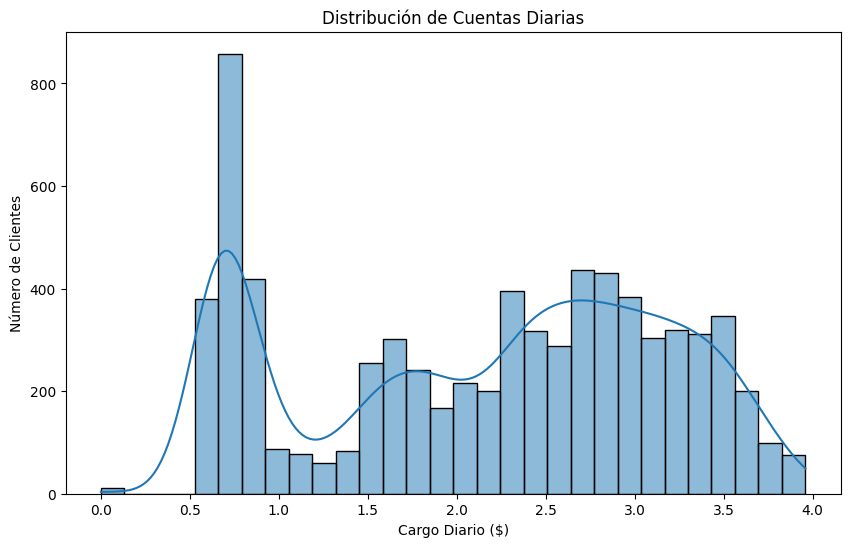

In [89]:
import numpy as np

# Calculamos el valor diario (cargo mensual / 30 días)
df_flat['Cuentas_Diarias'] = round(df_flat['Charges.Monthly'] / 30, 2)

# Para clientes con tenure=0, podríamos considerar el primer día de facturación completo
# Opcional: df.loc[df['tenure'] == 0, 'Cuentas_Diarias'] = df['Charges.Monthly']

# Verificación de resultados
print("\n--- Muestra de Cuentas Diarias ---")
print(df_flat[['customerID', 'Charges.Monthly', 'Cuentas_Diarias', 'tenure']].head(10))


# Estadísticas descriptivas
print("\n--- Estadísticas de Cuentas Diarias ---")
print(f"Media: ${round(df_flat['Cuentas_Diarias'].mean(), 2)} por día")
print(f"Mínimo: ${round(df_flat['Cuentas_Diarias'].min(), 2)}")
print(f"Máximo: ${round(df_flat['Cuentas_Diarias'].max(), 2)}")
print(f"Mediana: ${round(df_flat['Cuentas_Diarias'].median(), 2)}")

# Visualización rápida
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df_flat, x='Cuentas_Diarias', bins=30, kde=True)
plt.title('Distribución de Cuentas Diarias')
plt.xlabel('Cargo Diario ($)')
plt.ylabel('Número de Clientes')
plt.show()

Estandarización y transformación de datos (opcional)

Proceso opcional pero recomendado para:

Convertir valores categóricos (ej: "Sí"/"No" → 1/0) en formatos numéricos, facilitando modelos analíticos.

Renombrar columnas o traducir términos técnicos para mejorar comprensión y comunicación con stakeholders.

Asegurar consistencia en los datos, optimizando su interpretación y uso en etapas posteriores.

Beneficios clave:
✔ Compatibilidad con herramientas matemáticas.
✔ Información más accesible para equipos no técnicos.
✔ Reducción de ambigüedades en los resultados.


In [90]:
# 1. Verificar las columnas disponibles
print("\n1. Verificar las columnas disponibles")
print("Columnas disponibles en el DataFrame:")
print(df_flat.columns.tolist())

# 2. Buscar variantes del nombre 'Churn'
print("\n2. Buscar variantes del nombre 'Churn'")
possible_names = ['churn', 'CHURN', 'Status', 'Customer_Status', 'Churn_Status']
for name in possible_names:
    if name in df_flat.columns:
        print(f"\nColumna encontrada: {name}")
        # Renombrar a 'Churn' para estandarizar
        df_flat = df_flat.rename(columns={name: 'Churn'})
        break
else:
    print("\nNo se encontró ninguna columna equivalente a 'Churn' - se verificará en datos anidados")

# 3. Si no se encuentra, verificar en datos originales
print("\n3. Si no se encuentra, verificar en datos originales")
if 'Churn' not in df_flat.columns:
    print("\nRevisando estructura original...")
    if 'customer' in df_flat.columns and isinstance(df_flat['customer'].iloc[0], dict):
        print("Extrayendo 'Churn' de datos anidados...")
        df_flat['Churn'] = df_flat['customer'].apply(lambda x: x.get('Churn', None))

# 4. Limpieza y normalización de la columna 'Churn'
print("\n4. Limpieza y normalización de 'Churn'")
if 'Churn' in df_flat.columns:
    # Limpieza de valores
    df_flat['Churn'] = df_flat['Churn'].astype(str).str.strip().str.title()

    # Reemplazar valores inconsistentes
    df_flat['Churn'] = df_flat['Churn'].replace({
        'Nan': None,
        'N/a': None,
        '': None
    })

    # Filtrar solo valores Yes/No válidos
    valid_churn = df_flat['Churn'].isin(['Yes', 'No'])
    df_flat = df_flat[valid_churn].copy()

    print("\nValores únicos en 'Churn' después de limpieza:")
    print(df_flat['Churn'].value_counts(dropna=False))

    # Binarización robusta
    df_flat['Churn_Binario'] = df_flat['Churn'].map({'Yes': 1, 'No': 0}).astype('int8')

    print("\nBinarización completada (valores enteros):")
    print(df_flat[['Churn', 'Churn_Binario']].head())

    print("\nResumen final:")
    print(f"Total registros válidos: {len(df_flat)}")
    print(f"Distribución de Churn: {df_flat['Churn_Binario'].value_counts(normalize=True)}")
else:
    print("\nError crítico: No se pudo encontrar o crear la columna 'Churn'")
    print("Revisa la estructura de tus datos originales")

# Opcional: Guardar el dataframe limpio
df_flat.to_csv('datos_telecom_limpios.csv', index=False)
print("\nDataFrame limpio guardado como 'datos_telecom_limpios.csv'")


1. Verificar las columnas disponibles
Columnas disponibles en el DataFrame:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total', 'MonthlyGroup', 'ChurnBinary', 'Modified', 'Cuentas_Diarias']

2. Buscar variantes del nombre 'Churn'

No se encontró ninguna columna equivalente a 'Churn' - se verificará en datos anidados

3. Si no se encuentra, verificar en datos originales

4. Limpieza y normalización de 'Churn'

Valores únicos en 'Churn' después de limpieza:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Binarización completada (valores enteros):
  Churn  Churn_Binario
0    No              0
1    No              0
2   Yes              1
3   Yes              1
4   Yes              1

Resumen final:
Total regis